## Basics libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Iris Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df['Species'].replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2], inplace=True)

# Calculate prior

In [6]:
def _prior(d, Y):
    classes = sorted(list(d[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(d[d[Y]==i])/len(d))
    return prior

## Calculate likelihood.

In [7]:
def calculate_likelihood_gaussian(d, var_name, var_val, Y, label):
    feat = list(d.columns)
    d = d[d[Y]==label]
    mean, std = d[var_name].mean(), d[var_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((var_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate posterior and find the maximum

In [8]:
def naive_bayes_gaussian(d, X, Y):
    # feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = _prior(d, Y)
    prob=[]
    Y_pred = []
    # loop over every sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(d[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(d, features[i], x[i], Y, labels[j])

        # calculate posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
            #prob.append(post_prob)
        Y_pred.append(np.argmax(post_prob))
        
    #return prob
    return np.array(Y_pred)
    
    

 # model

In [9]:
from sklearn.model_selection import train_test_split
tr, tt = train_test_split(df, test_size=.3, random_state=42)

X_test = tt.iloc[:,:-1].values
Y_test = tt.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(tr, X=X_test, Y='Species')# performe train and test in single function call

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
#print(f1_score(Y_test, Y_pred,average='micro'))
#print(Y_test)
#rint(Y_pred)
#print(max(prob))


[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# confusion matrix

# accurcay

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
acc=accuracy_score(Y_test, Y_pred)
print("overall accuracy is {}".format(acc*100))
matrix=confusion_matrix(Y_test, Y_pred)
#Now the normalize the diagonal entries
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
a=matrix.diagonal()
print("Setosa accuracy is {}".format(a[0]*100))
print("versicolor accuracy is {}".format(a[1]*100))
print("Verginica accuracy is {}".format(a[2]*100))

overall accuracy is 97.77777777777777
Setosa accuracy is 100.0
versicolor accuracy is 92.3076923076923
Verginica accuracy is 100.0


In [77]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, Y_pred, target_names=['Setosa', 'versicolor', 'virginica']))

# #class 0 accurcay
# accuracy1=11/11
# print(accuracy1)
# accuracy2=
# print(accuracy2)
# accuracy3=len(Y_pred[Y_pred==2])/len(Y_test[Y_test==2])
# print(accuracy3)
accuracy=np.sum(Y_test==Y_pred)/len(Y_test)
print(accuracy)


Classification Report

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


# ROC curve

In [15]:
def naive_bayes_gaussian(d, X, Y):
    # feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = _prior(d, Y)
    prob=[]
    Y_pred = []
    # loop over every sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(d[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(d, features[i], x[i], Y, labels[j])

        # calculate posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        prob.append(post_prob)
        #Y_pred.append(np.argmax(post_prob))
        
    return np.array(prob)

In [16]:
prob = naive_bayes_gaussian(tr, X=X_test, Y='Species')
print(type(prob))
len(prob)
prob

<class 'numpy.ndarray'>


array([[3.64225969e-085, 2.60865745e-001, 1.32999214e-003],
       [5.56590862e-002, 1.63590352e-014, 4.13831351e-021],
       [2.92126388e-275, 4.39578223e-015, 7.76802916e-004],
       [4.03155257e-088, 2.38110600e-001, 6.64710021e-003],
       [1.59201842e-100, 4.95697806e-002, 1.02558638e-002],
       [4.67863848e-001, 6.58144944e-013, 1.11850459e-020],
       [2.03643917e-049, 1.91418459e-001, 8.92895515e-006],
       [4.81825499e-164, 6.16467073e-008, 9.54430516e-002],
       [1.03160100e-090, 5.16136052e-002, 3.74905730e-004],
       [1.61376426e-055, 3.93790676e-001, 2.38181988e-005],
       [1.30060890e-141, 4.96631991e-005, 1.50514577e-001],
       [6.38770105e-001, 2.10305121e-016, 2.27662595e-024],
       [4.65824406e-001, 3.07608456e-016, 1.15864618e-023],
       [9.25063540e-001, 6.42505308e-016, 1.26036267e-023],
       [1.15255640e+000, 7.35025205e-016, 5.81733351e-023],
       [1.37054890e-101, 1.33745390e-002, 1.76778926e-002],
       [6.13004224e-190, 7.92020601e-008

In [27]:
prob1 = prob.sum(axis=1)
normalized_array = prob / prob1[:, np.newaxis]
normalized_array

array([[1.38913764e-084, 9.94927484e-001, 5.07251624e-003],
       [1.00000000e+000, 2.93914908e-013, 7.43510861e-020],
       [3.76062424e-272, 5.65881272e-012, 1.00000000e+000],
       [1.64716067e-087, 9.72842120e-001, 2.71578798e-002],
       [2.66109698e-099, 8.28570775e-001, 1.71429225e-001],
       [1.00000000e+000, 1.40670186e-012, 2.39066257e-020],
       [1.06381808e-048, 9.99953356e-001, 4.66440840e-005],
       [5.04830032e-163, 6.45900005e-007, 9.99999354e-001],
       [1.98428649e-089, 9.92788681e-001, 7.21131886e-003],
       [4.09777773e-055, 9.99939519e-001, 6.04807571e-005],
       [8.63823242e-141, 3.29847239e-004, 9.99670153e-001],
       [1.00000000e+000, 3.29234445e-016, 3.56407717e-024],
       [1.00000000e+000, 6.60352812e-016, 2.48730243e-023],
       [1.00000000e+000, 6.94552622e-016, 1.36246065e-023],
       [1.00000000e+000, 6.37734695e-016, 5.04733088e-023],
       [4.41366047e-100, 4.30708266e-001, 5.69291734e-001],
       [3.19833546e-189, 4.13234930e-007

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,normalized_array,multi_class='ovr')

1.0

[]

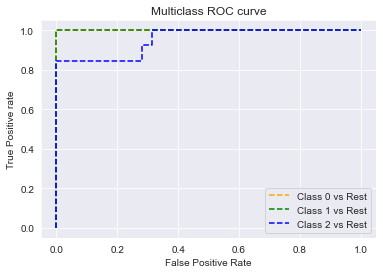

In [75]:
# roc curve for classes
from sklearn.metrics import roc_curve
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, prob[:,i], pos_label=i)
    
#plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot()
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot()
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot()
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300)
plt.plot()
plt.plot()

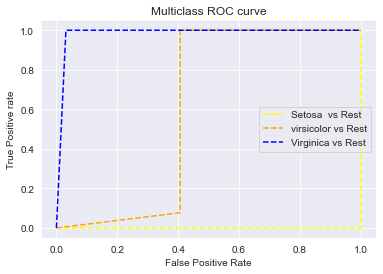

In [76]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Setosa  vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label='virsicolor vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Virginica vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  